### My personal analysis on covid cases and vaccinations

Data sources are:
    
Vaccinations: https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations/country_data
        
COVID cases: https://github.com/CSSEGISandData/COVID-19

In [1]:
%pylab inline
import pandas as pd

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

import matplotlib.dates as mdates

import xarray as xr

days = mdates.DayLocator()   # every day
weeks = mdates.WeekdayLocator(byweekday=TU)   # every week
months = mdates.MonthLocator()  # every month
weeks_fmt = mdates.DateFormatter('%d/%m \n%a')

matplotlib.rcParams['font.family'] = "Arial"
plt.rcParams["xtick.major.size"] = 6
plt.rcParams["xtick.minor.size"] = 4
plt.rcParams["ytick.major.size"] = 0

fnt_size=14

plt.rc('font', size=fnt_size) #controls default text size
plt.rc('axes', titlesize=fnt_size) #fontsize of the title
plt.rc('axes', labelsize=fnt_size) #fontsize of the x and y labels
plt.rc('xtick', labelsize=fnt_size-1) #fontsize of the x tick labels
plt.rc('ytick', labelsize=fnt_size) #fontsize of the y tick labels
plt.rc('legend', fontsize=fnt_size) #fontsize of the legend
plt.rcParams['axes.facecolor'] = 'w'

Populating the interactive namespace from numpy and matplotlib


#### Load global cases data

In [2]:
dat = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

# extract south africa and sweden

sweden = dat['Country/Region']=='Sweden'
southafrica = dat['Country/Region']=='South Africa'

# Sweden analysis
cases = dat[sweden].iloc[0][4:].diff()
dates = pd.to_datetime(dat[sweden].iloc[0][4:].index)

xds = xr.DataArray(cases, coords=[dates], dims=["time"])

# only look at the last three months
tomorrow  = np.datetime64('today') + np.timedelta64(1,'D')
three_mnths = np.datetime64('today') - np.timedelta64(90,'D')

daily = xds.sel(time=slice(three_mnths, tomorrow))

#### Figure: Sweden daily cases over the last 3 months

<ipython-input-3-f417618b5803>:26: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tight_layout" which is no longer supported as of 3.3 and will become an error two minor releases later
  savefig('../../cases_sweden_daily.png', dpi=300, tight_layout=True, bbox_inches='tight', transparent=False)


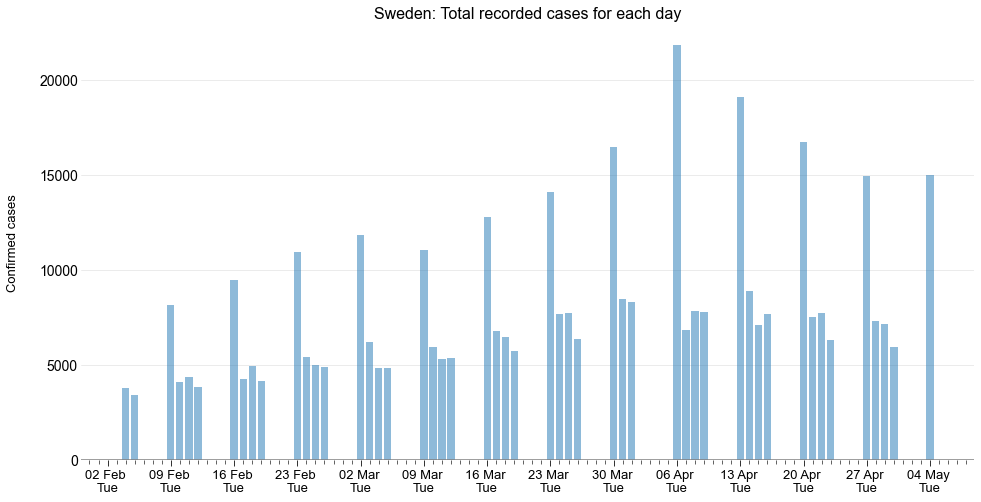

In [3]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_frame_on(False)


ax.bar(daily.time, daily, alpha=0.5, zorder=2)

ax.set_xlabel('')
ax.set_ylabel('Confirmed cases', fontsize=13, labelpad=20)

ax.grid(lw=0.5, c='0.85', axis='y', zorder=0)

# format the ticks
ax.xaxis.set_major_locator(weeks)
weeks_fmt = mdates.DateFormatter('%d %b \n%a')
ax.xaxis.set_major_formatter(weeks_fmt)
ax.xaxis.set_minor_locator(days)

plt.xticks(rotation=0)

xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ax.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='0.5', linewidth=1.5))

ax.set_title('Sweden: Total recorded cases for each day', fontsize=16)

savefig('../../cases_sweden_daily.png', dpi=300, tight_layout=True, bbox_inches='tight', transparent=False)

#### Weekly sum: due to irregular reporting, I take a look at the weekly total cases

In [4]:
tomorrow  = np.datetime64('today') + np.timedelta64(1,'D')
one_year = np.datetime64('today') - np.timedelta64(365,'D')

week_sw = xds.sel(time=slice(one_year, tomorrow))
week_sw = week_sw.resample(time='W-TUE').sum()

<ipython-input-5-d8294bbbbda2>:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tight_layout" which is no longer supported as of 3.3 and will become an error two minor releases later
  savefig('../../cases_sweden_week.png', dpi=300, tight_layout=True, bbox_inches='tight')


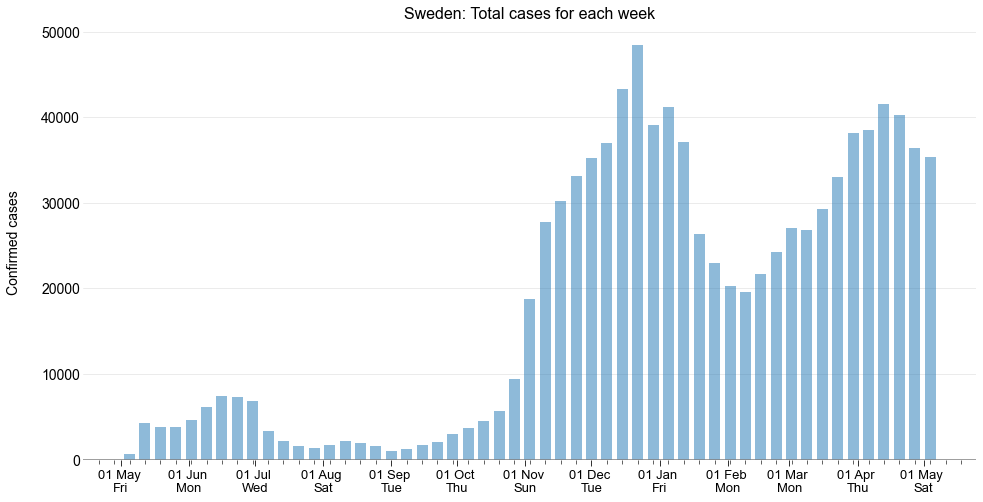

In [5]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_frame_on(False)

ax.bar(week_sw.time, week_sw, alpha=0.5, zorder=2, width=0.5e1)

# set label characteristics
ax.set_xlabel('')
ax.set_ylabel('Confirmed cases', labelpad=20)

ax.grid(lw=0.5, c='0.85', axis='y', zorder=0)

# format the ticks
month = mdates.MonthLocator()   # every week
weeks = mdates.WeekdayLocator(byweekday=TU)   # every week
ax.xaxis.set_major_locator(month)
weeks_fmt = mdates.DateFormatter('%d %b \n%a')
ax.xaxis.set_major_formatter(weeks_fmt)
ax.xaxis.set_minor_locator(weeks)

plt.xticks(rotation=0)

xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ax.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='0.5', linewidth=1.5))

ax.set_title('Sweden: Total cases for each week', fontsize=16)

savefig('../../cases_sweden_week.png', dpi=300, tight_layout=True, bbox_inches='tight')

#### South Africa analysis

In [6]:
cases = dat[southafrica].iloc[0][4:].diff()
dates = pd.to_datetime(dat[southafrica].iloc[0][4:].index)

xds = xr.DataArray(cases, coords=[dates], dims=["time"])

#### Figure: South Africa daily cases over the last 3 months

In [7]:
tomorrow  = np.datetime64('today') + np.timedelta64(1,'D')
three_mnths = np.datetime64('today') - np.timedelta64(90,'D')

daily = xds.sel(time=slice(three_mnths, tomorrow))

<ipython-input-8-035756526121>:26: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tight_layout" which is no longer supported as of 3.3 and will become an error two minor releases later
  savefig('../../cases_southafrica_daily.png', dpi=300, tight_layout=True, bbox_inches='tight')


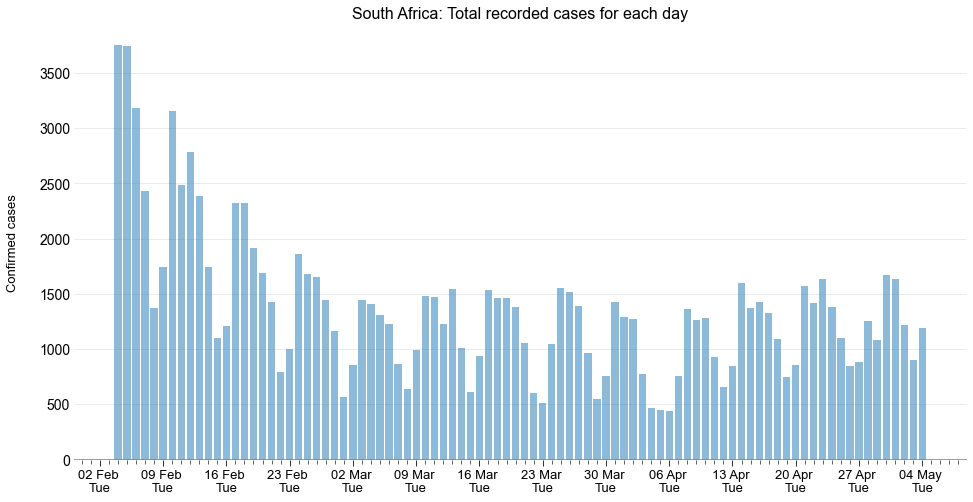

In [8]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_frame_on(False)


ax.bar(daily.time, daily, alpha=0.5, zorder=2)

ax.set_xlabel('')
ax.set_ylabel('Confirmed cases', fontsize=13, labelpad=20)

ax.grid(lw=0.5, c='0.85', axis='y', zorder=0)

# format the ticks
ax.xaxis.set_major_locator(weeks)
weeks_fmt = mdates.DateFormatter('%d %b \n%a')
ax.xaxis.set_major_formatter(weeks_fmt)
ax.xaxis.set_minor_locator(days)

plt.xticks(rotation=0)

xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ax.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='0.5', linewidth=1.5))

ax.set_title('South Africa: Total recorded cases for each day', fontsize=16)

savefig('../../cases_southafrica_daily.png', dpi=300, tight_layout=True, bbox_inches='tight')

#### Weekly cases

In [9]:
tomorrow  = np.datetime64('today') + np.timedelta64(1,'D')
one_year = np.datetime64('today') - np.timedelta64(365,'D')

week_sa = xds.sel(time=slice(one_year, tomorrow))
week_sa = week_sa.resample(time='W-TUE').sum()

<ipython-input-10-9935b8b498d7>:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tight_layout" which is no longer supported as of 3.3 and will become an error two minor releases later
  savefig('../../cases_southafrica_week.png', dpi=300, tight_layout=True, bbox_inches='tight')


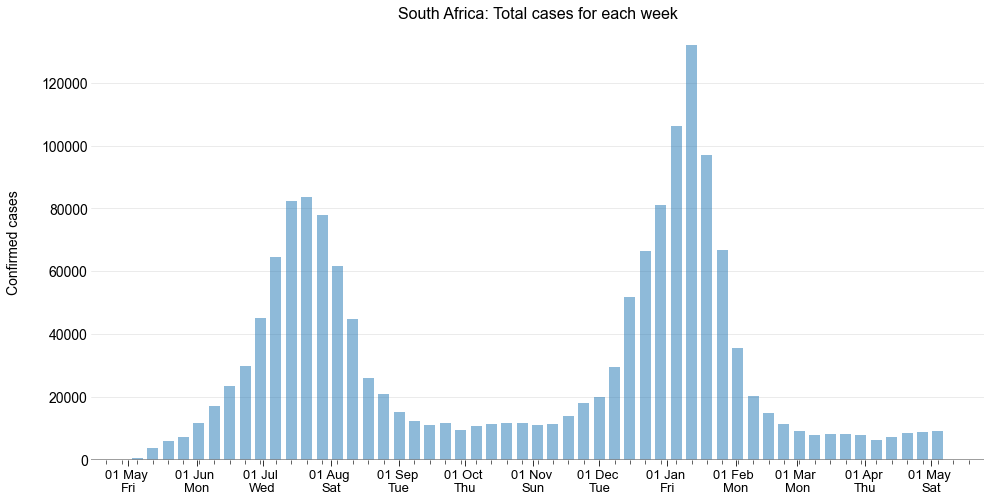

In [10]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_frame_on(False)

ax.bar(week_sa.time, week_sa, alpha=0.5, zorder=2, width=0.5e1)

# set label characteristics
ax.set_xlabel('')
ax.set_ylabel('Confirmed cases', labelpad=20)

ax.grid(lw=0.5, c='0.85', axis='y', zorder=0)

# format the ticks
month = mdates.MonthLocator()   # every week
weeks = mdates.WeekdayLocator(byweekday=TU)   # every week
ax.xaxis.set_major_locator(month)
weeks_fmt = mdates.DateFormatter('%d %b \n%a')
ax.xaxis.set_major_formatter(weeks_fmt)
ax.xaxis.set_minor_locator(weeks)

plt.xticks(rotation=0)

xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ax.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='0.5', linewidth=1.5))

ax.set_title('South Africa: Total cases for each week', fontsize=16)

savefig('../../cases_southafrica_week.png', dpi=300, tight_layout=True, bbox_inches='tight')

#### Plot Sweden and South Africa for comparison

<ipython-input-11-21fad1558138>:31: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tight_layout" which is no longer supported as of 3.3 and will become an error two minor releases later
  savefig('../../cases_sweden_southafrica_compare.png', dpi=300, tight_layout=True, bbox_inches='tight')


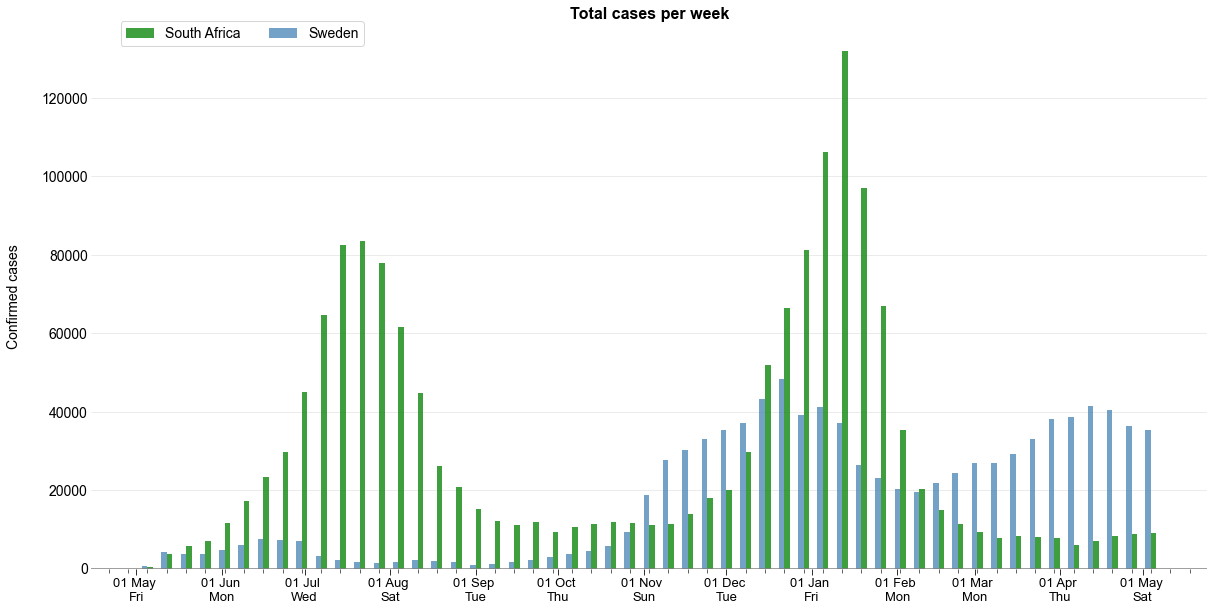

In [11]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_frame_on(False)

ax.bar(week_sa.time + np.timedelta64(1,'D'), week_sa, alpha=0.75, width=0.2e1, zorder=2, facecolor='green', label='South Africa')
ax.bar(week_sw.time - np.timedelta64(1,'D'), week_sw, alpha=0.75, width=0.2e1, zorder=2, facecolor='steelblue', label='Sweden')

# set label characteristics
ax.set_xlabel('')
ax.set_ylabel('Confirmed cases', labelpad=20)

ax.grid(lw=0.5, c='0.85', axis='y', zorder=0)

# format the ticks
month = mdates.MonthLocator()   # every week
weeks = mdates.WeekdayLocator(byweekday=TU)   # every week
ax.xaxis.set_major_locator(month)
weeks_fmt = mdates.DateFormatter('%d %b \n%a')
ax.xaxis.set_major_formatter(weeks_fmt)
ax.xaxis.set_minor_locator(weeks)

plt.xticks(rotation=0)

xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ax.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='0.5', linewidth=1.5))

ax.set_title('Total cases per week', fontweight='bold', fontsize=16)

ax.legend(loc=2, ncol=2, bbox_to_anchor=(0.02,1.02))

savefig('../../cases_sweden_southafrica_compare.png', dpi=300, tight_layout=True, bbox_inches='tight')

## Vaccinations

This looks and plots the vaccination data for South Africa and Sweden

#### Read in data

In [12]:
dat_sw = pd.read_csv('/Users/marcel/Google Drive/Projects/covid/COVID-19/sweden.csv')
dat_sw['date'] = pd.to_datetime(dat_sw.date)

dat_sa = pd.read_csv('/Users/marcel/Google Drive/Projects/covid/COVID-19/southafrica.csv')
dat_sa['date'] = pd.to_datetime(dat_sa.date)

dat_nw = pd.read_csv('/Users/marcel/Google Drive/Projects/covid/COVID-19/norway.csv')
dat_nw['date'] = pd.to_datetime(dat_nw.date)

dat_dn = pd.read_csv('/Users/marcel/Google Drive/Projects/covid/COVID-19/denmark.csv')
dat_dn['date'] = pd.to_datetime(dat_dn.date)

dat_uk = pd.read_csv('/Users/marcel/Google Drive/Projects/covid/COVID-19/unitedkingdom.csv')
dat_uk['date'] = pd.to_datetime(dat_uk.date)

dat_fn = pd.read_csv('/Users/marcel/Google Drive/Projects/covid/COVID-19/finland.csv')
dat_fn['date'] = pd.to_datetime(dat_fn.date)

dat_gm = pd.read_csv('/Users/marcel/Google Drive/Projects/covid/COVID-19/germany.csv')
dat_gm['date'] = pd.to_datetime(dat_gm.date)

dat_it = pd.read_csv('/Users/marcel/Google Drive/Projects/covid/COVID-19/italy.csv')
dat_it['date'] = pd.to_datetime(dat_it.date)

dat_fr = pd.read_csv('/Users/marcel/Google Drive/Projects/covid/COVID-19/france.csv')
dat_fr['date'] = pd.to_datetime(dat_fr.date)

dat_sp = pd.read_csv('/Users/marcel/Google Drive/Projects/covid/COVID-19/spain.csv')
dat_sp['date'] = pd.to_datetime(dat_sp.date)

dat_ir = pd.read_csv('/Users/marcel/Google Drive/Projects/covid/COVID-19/ireland.csv')
dat_ir['date'] = pd.to_datetime(dat_ir.date)

#### Population statistics

I got these numbers from just googling around, please let me know if I've got some wrong. I mainly used statista.com, for example: https://www.statista.com/statistics/454349/population-by-age-group-germany/

In [13]:
# Sweden
sw_pop = 10.38e6
sw_pop_under18 = 2189403
sw_pop_vac = sw_pop-sw_pop_under18

# Finland
fn_pop = 5.55e6 
fn_pop_under18 = 1.17e6
fn_pop_vac = fn_pop-fn_pop_under18

# Norway
nw_pop = 5.39e6
nw_pop_under18 = 1.19e6
nw_pop_vac = nw_pop-nw_pop_under18

# Denmark
dn_pop = 5.84e6
dn_pop_under18 = 1.29e6

dn_pop_vac = dn_pop-dn_pop_under18

# United Kingdom
uk_pop = 66.65e6
uk_pop_under18 = 14e6
uk_pop_vac = uk_pop-uk_pop_under18

# South Africa
sa_pop = 58.56e6
sa_pop_under18 = 19.8e6
sa_pop_vac = sa_pop-sa_pop_under18

# Germany
gm_pop = 83.19e6
gm_pop_under18 = 13.68e6
gm_pop_vac = gm_pop-gm_pop_under18

# France
fr_pop = 65.24e6
fr_pop_under18 = 15.43
fr_pop_vac = fr_pop-fr_pop_under18

# Spain
sp_pop = 46.75e6
sp_pop_under18 = 4.54e6
sp_pop_vac = sp_pop-sp_pop_under18

# Italy
it_pop = 60.5e6
it_pop_under18 = 9.61e6
it_pop_vac = it_pop-it_pop_under18

#### First I take a look at the South African and Swedish cases and vaccination doses, with the hope that a trend will eventually emerge with increasing vaccinations and decreasing cases.

In [14]:
dat_sw.index = dat_sw.date
dat_sw = dat_sw.to_xarray()

dat_sa.index = dat_sa.date
dat_sa = dat_sa.to_xarray()

In [15]:
dat_sw_extra = dat_sw.isel(date=-1)
dat_sw_extra['date'] = np.datetime64('2021-05-04')
dat_sw_extra['people_vaccinated'] = 2681307
dat_sw = xr.concat([dat_sw, dat_sw_extra], dim='date')

In [16]:
# dat_sa_extra = dat_sa.isel(date=-1)
# dat_sa_extra['date'] = np.datetime64('2021-04-19')
# dat_sa_extra['people_vaccinated'] = 292623
# dat_sa = xr.concat([dat_sa, dat_sa_extra], dim='date')

In [17]:
tomorrow  = np.datetime64('today') + np.timedelta64(1,'D')
three_weeks = np.datetime64('today') - np.timedelta64(14,'D')

dat_sw_1M = dat_sw.sel(date=slice(three_weeks, tomorrow))
dat_sa_1M = dat_sa.sel(date=slice(three_weeks, tomorrow))

### Sweden one and two doses

<ipython-input-18-bac40a15a0a8>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.yaxis.set_ticklabels(percentage)


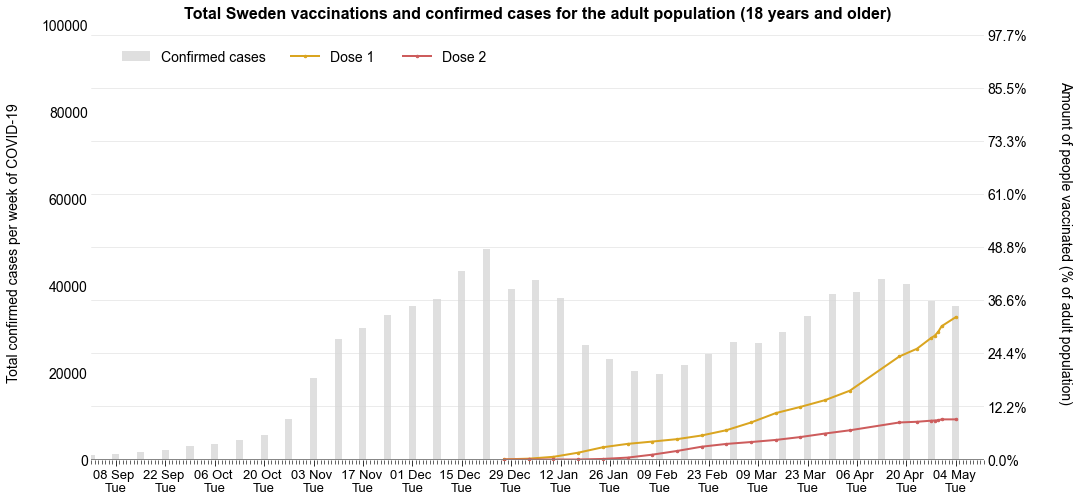

In [18]:
fig, ax = plt.subplots(figsize=(16, 8))


ax.bar(week_sw.time, week_sw, alpha=0.25, zorder=2, width=0.2e1, facecolor='0.5', label='Confirmed cases')
ax.set_ylim(0, 100000)


# plot a second axis to use for the percentage
ax1 = ax.twinx()


# plot the numbers
ax1.plot(dat_sw.date.values, dat_sw['people_vaccinated'],       marker='.', markersize=5, zorder=2, lw=2, label='Dose 1', color='goldenrod')
ax1.plot(dat_sw.date.values, dat_sw['people_fully_vaccinated'], marker='.', markersize=5, zorder=2, lw=2, label='Dose 2', color='indianred')

ax1.set_ylim(0, sw_pop_vac)

locs, labels = yticks()
labels = locs/sw_pop_vac
percentage = ["{:.1%}".format(l) for l in labels]

ax1.yaxis.set_ticklabels(percentage)

# set label characteristics
ax.set_xlabel('')
ax.set_ylabel('Total confirmed cases per week of COVID-19', labelpad=20)
ax1.set_ylabel('Amount of people vaccinated (% of adult population)', labelpad=45, rotation=-90)

ax1.grid(lw=0.5, c='0.85', axis='y', zorder=0)

# format the ticks
month = mdates.MonthLocator()   # every week
weeks = mdates.WeekdayLocator(byweekday=TU, interval=2)   # every week
weeks_fmt = mdates.DateFormatter('%d %b \n%a')

for a in [ax, ax1]:

    a.xaxis.set_major_locator(weeks)
    a.xaxis.set_major_formatter(weeks_fmt)
    a.xaxis.set_minor_locator(days)

    a.set_frame_on(False)

    xmin, xmax = a.get_xaxis().get_view_interval()
    ymin, ymax = a.get_yaxis().get_view_interval()
    a.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='0.5', linewidth=1.5))
    
    a.set_xlim('2020-09-01', np.datetime64('today')+ np.timedelta64(7,'D'))

ax.set_title('Total Sweden vaccinations and confirmed cases for the adult population (18 years and older)', fontsize=16, fontweight='bold')

ax.legend(loc=2, ncol=2, bbox_to_anchor=(0.02,0.97), frameon=False)
ax1.legend(loc=2, ncol=2, bbox_to_anchor=(0.21,0.97), frameon=False)

### South Africa one and two doses

<ipython-input-19-91432e2755df>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.yaxis.set_ticklabels(percentage)


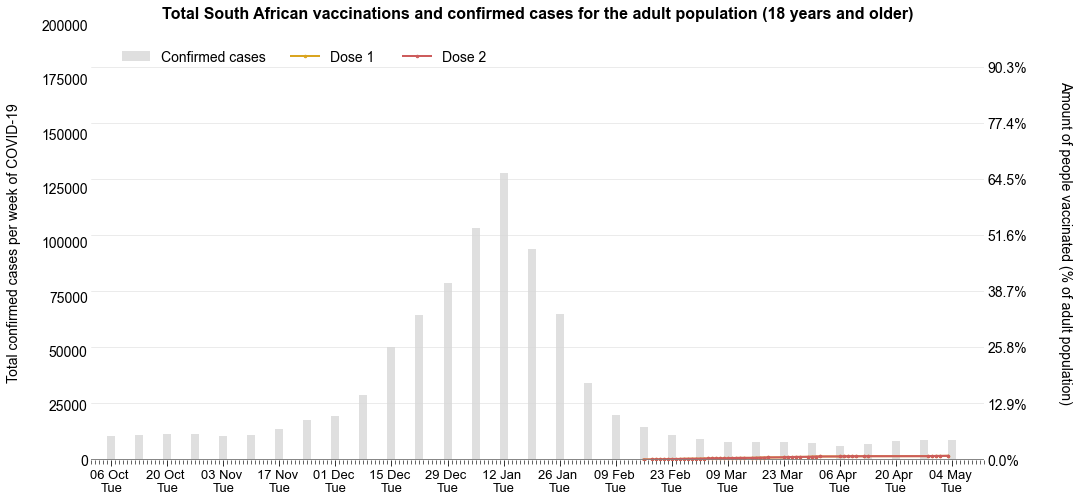

In [19]:
fig, ax = plt.subplots(figsize=(16, 8))


ax.bar(week_sa.time, week_sa, alpha=0.25, zorder=2, width=0.2e1, facecolor='0.5', label='Confirmed cases')
ax.set_ylim(0, 200000)


# plot a second axis to use for the percentage
ax1 = ax.twinx()


# plot the numbers
ax1.plot(dat_sa.date.values, dat_sa['people_vaccinated'],       marker='.', markersize=5, zorder=2, lw=2, label='Dose 1', color='goldenrod')
ax1.plot(dat_sa.date.values, dat_sa['people_fully_vaccinated'], marker='.', markersize=5, zorder=2, lw=2, label='Dose 2', color='indianred')

ax1.set_ylim(0, sa_pop_vac)

locs, labels = yticks()
labels = locs/sa_pop_vac
percentage = ["{:.1%}".format(l) for l in labels]

ax1.yaxis.set_ticklabels(percentage)

# set label characteristics
ax.set_xlabel('')
ax.set_ylabel('Total confirmed cases per week of COVID-19', labelpad=20)
ax1.set_ylabel('Amount of people vaccinated (% of adult population)', labelpad=45, rotation=-90)

ax1.grid(lw=0.5, c='0.85', axis='y', zorder=0)

# format the ticks
month = mdates.MonthLocator()   # every week
weeks = mdates.WeekdayLocator(byweekday=TU, interval=2)   # every week
weeks_fmt = mdates.DateFormatter('%d %b \n%a')

for a in [ax, ax1]:

    a.xaxis.set_major_locator(weeks)
    a.xaxis.set_major_formatter(weeks_fmt)
    a.xaxis.set_minor_locator(days)

    a.set_frame_on(False)

    xmin, xmax = a.get_xaxis().get_view_interval()
    ymin, ymax = a.get_yaxis().get_view_interval()
    a.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='0.5', linewidth=1.5))
    
    a.set_xlim('2020-10-01', np.datetime64('today')+ np.timedelta64(7,'D'))

ax.set_title('Total South African vaccinations and confirmed cases for the adult population (18 years and older)', fontsize=16, fontweight='bold')

ax.legend(loc=2, ncol=2, bbox_to_anchor=(0.02,0.97), frameon=False)
ax1.legend(loc=2, ncol=2, bbox_to_anchor=(0.21,0.97), frameon=False)

#### Now I compare a couple of countries 

Total amount of people vaccinated at least once

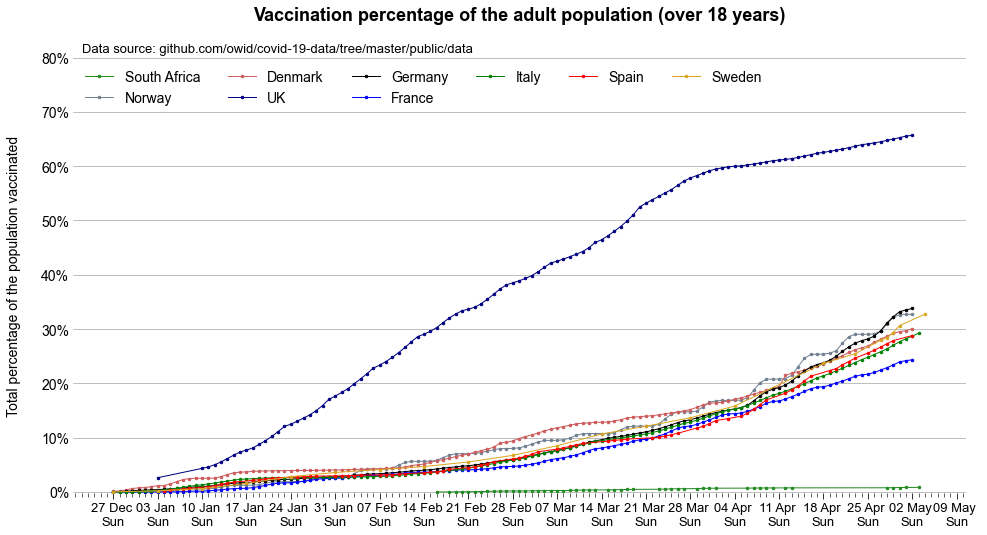

In [20]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(16, 8))
ax.set_frame_on(False)

ax.plot(dat_sa.date.values, 100*dat_sa['people_vaccinated']/sa_pop_vac, marker='.', markersize=5, zorder=2, lw=1, label='South Africa', c='forestgreen')
ax.plot(dat_nw.date.values, 100*dat_nw['people_vaccinated']/nw_pop_vac, marker='.', markersize=5, zorder=2, lw=1, label='Norway',       c='slategrey')
ax.plot(dat_dn.date.values, 100*dat_dn['people_vaccinated']/dn_pop_vac, marker='.', markersize=5, zorder=2, lw=1, label='Denmark',      c='indianred')
ax.plot(dat_uk.date.values, 100*dat_uk['people_vaccinated']/uk_pop_vac, marker='.', markersize=5, zorder=2, lw=1, label='UK',           c='navy')
# ax.plot(dat_fn.date.values, 100*dat_fn['people_vaccinated']/fn_pop_vac, marker='.', markersize=5, zorder=2, lw=1, label='Finland',      c='steelblue')
ax.plot(dat_gm.date.values, 100*dat_gm['people_vaccinated']/gm_pop_vac, marker='.', markersize=5, zorder=2, lw=1, label='Germany',      c='k')
ax.plot(dat_fr.date.values, 100*dat_fr['people_vaccinated']/fr_pop_vac, marker='.', markersize=5, zorder=2, lw=1, label='France',       c='blue')
ax.plot(dat_it.date.values, 100*dat_it['people_vaccinated']/it_pop_vac, marker='.', markersize=5, zorder=2, lw=1, label='Italy',        c='green')
ax.plot(dat_sp.date.values, 100*dat_sp['people_vaccinated']/sp_pop_vac, marker='.', markersize=5, zorder=2, lw=1, label='Spain',        c='red')
ax.plot(dat_sw.date.values, 100*dat_sw['people_vaccinated']/sw_pop_vac, marker='.', markersize=5, zorder=2, lw=1, label='Sweden',       c='goldenrod')

# set label characteristics
ax.set_xlabel('')
ax.set_ylabel('Total percentage of the population vaccinated', labelpad=20)

ax.grid(lw=0.5, c='0.5', axis='y', zorder=0)

# format the ticks
month = mdates.MonthLocator()   # every week
weeks = mdates.WeekdayLocator(byweekday=SU)   # every week
weeks_fmt = mdates.DateFormatter('%d %b \n%a')

ax.xaxis.set_major_locator(weeks)
ax.xaxis.set_major_formatter(weeks_fmt)
ax.xaxis.set_minor_locator(days)

ax.set_frame_on(False)

xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ax.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='0.5', linewidth=1.5))

plt.xticks(rotation=0)

ax.set_title('Vaccination percentage of the adult population (over 18 years)', fontsize=18, pad=20, fontweight='bold', y=1.04)

ax.text(pd.to_datetime('2020-12-22'), 81, 'Data source: github.com/owid/covid-19-data/tree/master/public/data', fontsize=13)

ax.legend(loc=2, ncol=6, frameon=False)

xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ax.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='0.5', linewidth=1.5))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_ylim(-0.1, 80)

savefig('../../vaccine_numbers_countries.png', dpi=300, bbox_inches='tight')

### Forecasts

Now I do some basic stats where I look at the rate of vaccinations over the last 3 weeks, and forecast this to predict when the date when 100% of the adult population will be vaccinated 

#### South Africa

In [21]:
# fig, ax = plt.subplots(figsize=(16, 8))
# ax.set_frame_on(False)

# # -------------- sweden --------------

# x = date2num(dat_sa_1M.date.values)-date2num(dat_sa_1M.date.values)[0]
# y = 100*dat_sa_1M['people_vaccinated']/sa_pop_vac

# m, b = np.polyfit(x, y, 1)

# ax.plot(dat_sa.date.values, 100*dat_sa['people_vaccinated']/sa_pop_vac, label='Vaccinations completed', marker='.', lw=1, markersize=5, c='forestgreen', zorder=2)

# latest_value = (100*dat_sa['people_vaccinated']/sa_pop_vac)[-1].values
# days_to_100  = np.round((100-latest_value)/m)
# est_date_100 = dat_sa_1M.date[-1] + np.timedelta64(int(days_to_100),'D')

# xnew = np.arange(0, days_to_100+latest_value, 1)

# ax.plot(num2date(xnew+date2num(dat_sa_1M.date.values)[0]), m*xnew + b, label='y = '+str(np.round(m, 2))+' x + '+str(np.round(b, 2))+' (% people vaccinated per day)', lw=3, c='0.7', ls='--', alpha=1)

# # plots

# ax.set_ylabel('Percentage of people over 18 years old vaccinated', labelpad=20)

# ax.grid(lw=0.5, c='0.85', axis='y', zorder=0)

# # format the ticks
# year = mdates.YearLocator()   # every week
# month = mdates.MonthLocator()   # every week
# # ax.xaxis.set_major_locator(year)
# year_fmt = mdates.DateFormatter('%b %Y')
# ax.xaxis.set_major_formatter(year_fmt)
# ax.xaxis.set_minor_locator(month)
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# ax.legend(loc=2, ncol=1, bbox_to_anchor=(0.02,0.95), frameon=False)

# last_rec = (100*dat_sa['people_vaccinated']/sa_pop_vac)[-1]

# ax.set_title('South Africa vaccinations (and projection based on the last 3 weeks) of the adult population of ' + str(np.round(sa_pop_vac/1e6, 1)) + ' million people \n '
#              ' \n'
#              'Est. date to 100%: '+str(est_date_100.values)[:10] + ' (' + str(days_to_100) + ' days) \n' 
#              ' \n'
#              'Lastest record value: '+str(dat_sa['people_vaccinated'][-1].values)+' people vaccinated, or '+str(np.round(last_rec.values, 2))+'% as of '+str(last_rec.date.values)[:10]
#              , fontsize=16, fontweight='bold', pad=20)

# xmin, xmax = ax.get_xaxis().get_view_interval()
# ymin, ymax = ax.get_yaxis().get_view_interval()
# ax.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='0.5', linewidth=1.5))

# # ax.set_ylim(-0.3, 105)

# est_date = num2date(xnew+date2num(dat_sa_1M.date.values)[0])[-1]

# ax.scatter(est_date, (m*xnew + b)[-1], s=150, c='forestgreen', lw=1.5, edgecolor='k', zorder=10)
# ax.scatter(est_date, (m*xnew + b)[-1], s=10, c='k', lw=1.5, edgecolor='k', zorder=10)
# ax.text(est_date, 95, str(est_date_100.values)[:10], fontweight='bold')

# ax.plot([est_date, est_date], [0, 100], lw=1, c='0.75')

# savefig('../../vaccine_southafrica_projection.png', dpi=300, bbox_inches='tight')

#### Sweden

In [22]:
df1 = pd.read_excel('Folkhalsomyndigheten_Covid19_Vaccine.xlsx', sheet_name='Vaccinerade kommun')
idx = df1['KnNamn']=='Göteborg'

df1[idx]

got_ppl = 467623

dates     = ['2021-04-18', '2021-04-25']
dates     = pd.to_datetime(dates)
week      = ['v15', 'v16']
got_1dose = np.array([68713, 83129])
got_2dose = np.array([28135, 29252])

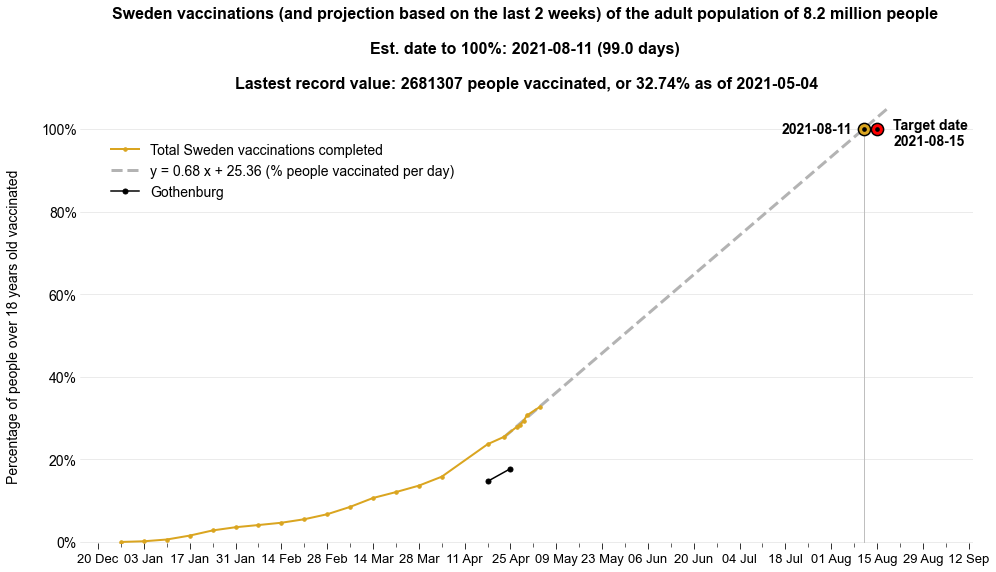

In [23]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_frame_on(False)

# -------------- sweden --------------

x = date2num(dat_sw_1M.date.values)-date2num(dat_sw_1M.date.values)[0]
y = 100*dat_sw_1M['people_vaccinated']/sw_pop_vac

m, b = np.polyfit(x, y, 1)

ax.plot(dat_sw.date.values, 100*dat_sw['people_vaccinated']/sw_pop_vac, label='Total Sweden vaccinations completed', marker='.', lw=2, markersize=7, c='goldenrod', zorder=10)

latest_value = (100*dat_sw['people_vaccinated']/sw_pop_vac)[-1].values
days_to_100  = np.round((100-latest_value)/m)
est_date_100 = dat_sw_1M.date[-1] + np.timedelta64(int(days_to_100),'D')

xnew = np.arange(0, days_to_100+latest_value, 1)

ax.plot(num2date(xnew+date2num(dat_sw_1M.date.values)[0]), m*xnew + b, label='y = '+str(np.round(m, 2))+' x + '+str(np.round(b, 2))+' (% people vaccinated per day)', lw=3, c='0.7', ls='--', alpha=1)

# plots

### gothenburg plot

ax.plot(dates, 100*(got_1dose/got_ppl), c='k', marker='.', markersize=10, label='Gothenburg')

###

ax.set_ylabel('Percentage of people over 18 years old vaccinated', labelpad=20)

ax.grid(lw=0.5, c='0.85', axis='y', zorder=0)

# format the ticks
month = mdates.MonthLocator()   # every week
week  = mdates.WeekdayLocator(byweekday=SU, interval=1)   # every week
weeks = mdates.WeekdayLocator(byweekday=SU, interval=2)   # every week
ax.xaxis.set_major_locator(weeks)
weeks_fmt = mdates.DateFormatter('%d %b')
ax.xaxis.set_major_formatter(weeks_fmt)
ax.xaxis.set_minor_locator(week)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.legend(loc=2, ncol=1, bbox_to_anchor=(0.02,0.95), frameon=False)

last_rec = (100*dat_sw['people_vaccinated']/sw_pop_vac)[-1]

idx_100 = np.argmin(np.abs((m*xnew + b)-100))
est_date = num2date(xnew+date2num(dat_sw_1M.date.values)[0])[idx_100]

ax.set_title('Sweden vaccinations (and projection based on the last 2 weeks) of the adult population of ' + str(np.round(sw_pop_vac/1e6, 1)) + ' million people \n '
             ' \n'
             'Est. date to 100%: '+str(est_date)[:10] + ' (' + str(days_to_100) + ' days) \n' 
             ' \n'
             'Lastest record value: '+str(dat_sw['people_vaccinated'][-1].values)+' people vaccinated, or '+str(np.round(last_rec.values, 2))+'% as of '+str(last_rec.date.values)[:10]
             , fontsize=16, fontweight='bold', pad=20)

xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ax.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='0.5', linewidth=1.5))

ax.set_ylim(-0.3, 105)

ax.scatter(est_date, (m*xnew + b)[idx_100], s=150, c='goldenrod', lw=1.5, edgecolor='k', zorder=10)
ax.scatter(est_date, (m*xnew + b)[idx_100], s=10, c='k', lw=1.5, edgecolor='k', zorder=10)
ax.text(est_date_100 - np.timedelta64(25,'D'), 99, str(est_date)[:10], fontweight='bold')

ax.plot([est_date, est_date], [0, 100], lw=1, c='0.75')

target_date = pd.to_datetime('2021-08-15')

ax.scatter(target_date, 100, s=150, c='red', lw=1.5, edgecolor='k', zorder=10)
ax.scatter(target_date, 100, s=10, c='k', lw=1.5, edgecolor='k', zorder=10)

ax.text(target_date + np.timedelta64(5,'D'), 96, 'Target date \n'+str(target_date)[:10], fontweight='bold')

savefig('../../vaccine_sweden_projection.png', dpi=300, bbox_inches='tight')

### Stats per day

In [24]:
print(str(dat_sw_1M['people_vaccinated'].diff(dim='date')[-1].values)+' or '+str(np.round(100*dat_sw_1M['people_vaccinated'].diff(dim='date')[-1].values/sw_pop_vac, 2))+'% of people vaccinated in Sweden from '+str(dat_sw_1M.date[-2].values)[:10]+' to '+str(dat_sw_1M.date[-1].values)[:10])
# print(str(dat_sa_1M['people_vaccinated'].diff(dim='date')[-1].values)+' or '+str(np.round(100*dat_sa_1M['people_vaccinated'].diff(dim='date')[-1].values/sa_pop_vac, 2))+'% of people vaccinated in SA '+str(dat_sa_1M.date[-2].values)[:10]+' to '+str(dat_sa_1M.date[-1].values)[:10])

170186 or 2.08% of people vaccinated in Sweden from 2021-04-30 to 2021-05-04


Sweden population by age according to https://www.statista.com/statistics/521717/sweden-population-by-age/:

In [25]:
age_0_4      = 595000
age_5_14     = 1243000
age_15_24    = 1156000
age_25_34    = 1458000
age_35_44    = 1293000
age_45_54    = 1336000
age_55_64    = 1211000
age_65_74    = 1087000
age_75_84    = 738000
age_85_94    = 240000
age_95_older = 23000

In [26]:
age_18_24 = (age_15_24/10)*7

In [27]:
total = age_18_24+age_25_34+age_35_44+age_45_54+age_55_64+age_65_74+age_75_84+age_85_94+age_95_older 

In [28]:
age_18_24    = 100*age_18_24   /total
age_25_34    = 100*age_25_34   /total
age_35_44    = 100*age_35_44   /total
age_45_54    = 100*age_45_54   /total
age_55_64    = 100*age_55_64   /total
age_65_74    = 100*age_65_74   /total
age_75_84    = 100*age_75_84   /total
age_85_94    = 100*age_85_94   /total
age_95_older = 100*age_95_older/total

In [29]:
all_pop = np.array([age_18_24, age_25_34, age_35_44, age_45_54, age_55_64, age_65_74, age_75_84, age_85_94, age_95_older ])

In [30]:
date = num2date(xnew+date2num(dat_sw_1M.date.values)[0])

proj = m*xnew + b

In [31]:
proj_date_55_64 = date[np.argmin(np.abs(proj-np.sum(all_pop[-4:])))]
proj_date_45_54 = date[np.argmin(np.abs(proj-np.sum(all_pop[-5:])))]
proj_date_35_44 = date[np.argmin(np.abs(proj-np.sum(all_pop[-6:])))]
proj_date_25_34 = date[np.argmin(np.abs(proj-np.sum(all_pop[-7:])))]
proj_date_15_24 = date[np.argmin(np.abs(proj-np.sum(all_pop[-8:])))]

Text(1.35, 18.276927140025194, '17.78%')

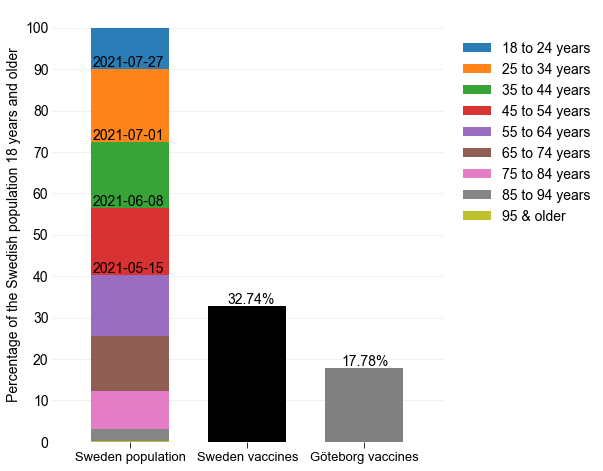

In [32]:
fig, ax = subplots(figsize=[7, 8])
ax.set_frame_on(False)

ax.bar(0, all_pop[0], label='18 to 24 years', width=0.5, bottom=np.sum(all_pop[-8:]), alpha=0.95, zorder=10)
ax.bar(0, all_pop[1], label='25 to 34 years', width=0.5, bottom=np.sum(all_pop[-7:]), alpha=0.95, zorder=10)
ax.bar(0, all_pop[2], label='35 to 44 years', width=0.5, bottom=np.sum(all_pop[-6:]), alpha=0.95, zorder=10)
ax.bar(0, all_pop[3], label='45 to 54 years', width=0.5, bottom=np.sum(all_pop[-5:]), alpha=0.95, zorder=10)
ax.bar(0, all_pop[4], label='55 to 64 years', width=0.5, bottom=np.sum(all_pop[-4:]), alpha=0.95, zorder=10)
ax.bar(0, all_pop[5], label='65 to 74 years', width=0.5, bottom=np.sum(all_pop[-3:]), alpha=0.95, zorder=10)
ax.bar(0, all_pop[6], label='75 to 84 years', width=0.5, bottom=np.sum(all_pop[-2:]), alpha=0.95, zorder=10)
ax.bar(0, all_pop[7], label='85 to 94 years', width=0.5, bottom=np.sum(all_pop[-1]) , alpha=0.95, zorder=10)
ax.bar(0, all_pop[8], label='95 & older'    , width=0.5, bottom=0, alpha=0.95, zorder=10)


ax.bar(0.75, (100*dat_sw['people_vaccinated']/sw_pop_vac)[-1], width=0.5, facecolor='k', zorder=10)

ax.grid(lw=0.5, c='0.85', axis='y', zorder=0, ls='--')
ax.yaxis.set_ticks(np.arange(0, 110, 10))

ax.xaxis.set_ticks([0, 0.75, 1.5])
ax.xaxis.set_ticklabels(['Sweden population', 'Sweden vaccines', 'Göteborg vaccines'])

ax.legend(loc=2, ncol=1, bbox_to_anchor=(1.02,0.95), frameon=False)

ax.set_ylabel('Percentage of the Swedish population 18 years and older')

ax.set_xlim(-0.5, 2)

ax.text(-0.24, np.sum(all_pop[-8:])+0.5, str(proj_date_15_24)[:10], fontsize=14, zorder=11)
ax.text(-0.24, np.sum(all_pop[-7:])+0.5, str(proj_date_25_34)[:10], fontsize=14, zorder=11)
ax.text(-0.24, np.sum(all_pop[-6:])+0.5, str(proj_date_35_44)[:10], fontsize=14, zorder=11)
ax.text(-0.24, np.sum(all_pop[-5:])+0.5, str(proj_date_45_54)[:10], fontsize=14, zorder=11)

ax.text(0.62, (100*dat_sw['people_vaccinated']/sw_pop_vac)[-1]+0.5, str(np.round((100*dat_sw['people_vaccinated']/sw_pop_vac)[-1].values, 2))+'%', fontsize=14, zorder=11)

ax.bar(1.5, 100*(got_1dose[-1]/got_ppl), width=0.5, facecolor='0.5', zorder=10)

ax.text(1.35, 100*(got_1dose[-1]/got_ppl)+0.5, str(np.round(100*(got_1dose[-1]/got_ppl), 2))+'%', fontsize=14, zorder=11)


# savefig('../../vaccine_sweden_population.png', dpi=300, bbox_inches='tight')

In [45]:
100*(got_1dose[-1]/got_ppl)+0.5

18.276927140025194